In [4]:
import os
import pickle
from tqdm.notebook import tqdm

file_list = os.listdir("data/argoverse_processed_smoothing/train/")

In [5]:
import numpy as np

def having_nan(arr):
    nan_check = np.isnan(arr)
    return (True in nan_check)

def having_strange_size(arr):
    if len(arr) == 0:
        return False
    
    
    arr_shape = (np.array(arr).shape)
    if len(arr_shape) !=2 or arr_shape[1] !=2:
        return True
    else:
        return False
        
    print(len(arr_shape))
strange_file = []
    
for f in tqdm(file_list):
    with open("data/argoverse_processed_smoothing/train/" + f, 'rb') as fw:
        data = pickle.load(fw)
        checking_list = []
        checking_list.append((data["AGENT"]["XY_FEATURES"], "AGENT_XY_FEATURES"))
        if "LABELS" in data["AGENT"].keys():
            checking_list.append((data["AGENT"]["LABELS"], "AGENT_LABELS"))
        for i,s in enumerate(data["SOCIAL"]):
            
            checking_list.append((s["XY_FEATURES"], "SOCIAL_XY_FEATURES"))
            if "LABELS" in s.keys():
                checking_list.append((s["LABELS"], "SOCIAL_LABELS"))
        
        for c in checking_list:
            if having_nan(c[0]):
#                 print("=====================================having_nan=========================================")
#                 print(f)
#                 print(c[0])
#                 print(c[1])
                print([c[0]])
                assert False, ""
                strange_file.append(data["PATH"].split('/')[-1].split('.')[0])
                break
            if having_strange_size(c[0]):
                print("====================================strange_size=======================================")
                print(f)
                print(c[0])
                print(c[1])


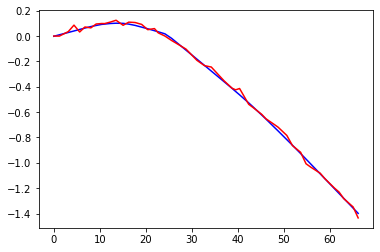

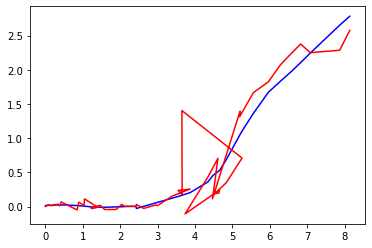

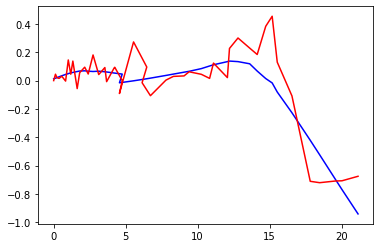

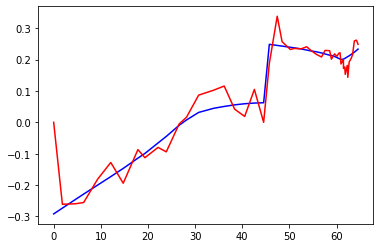

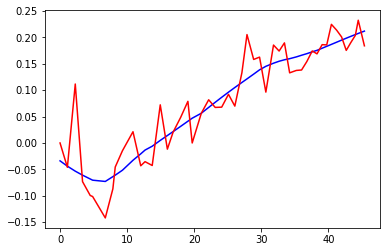

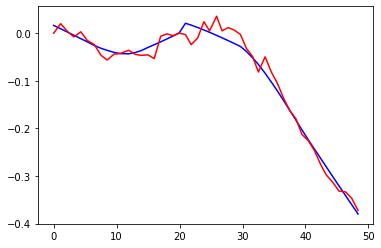

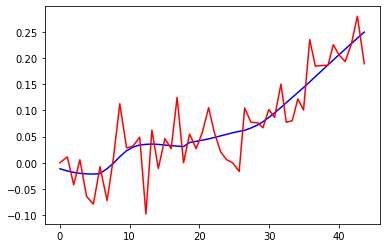

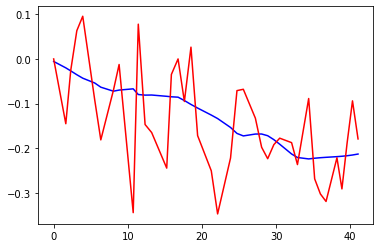

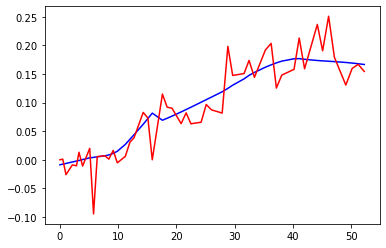

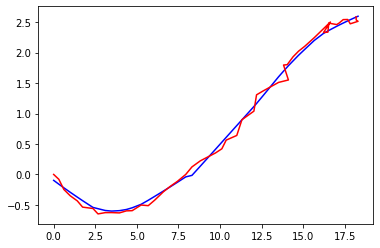

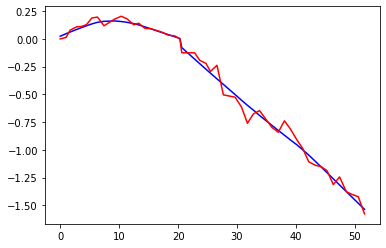

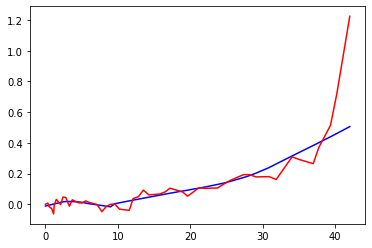

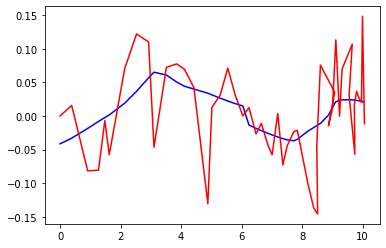

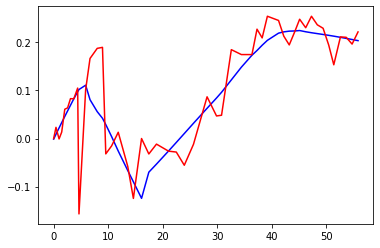

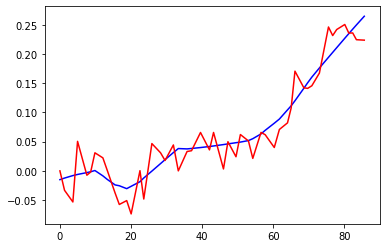

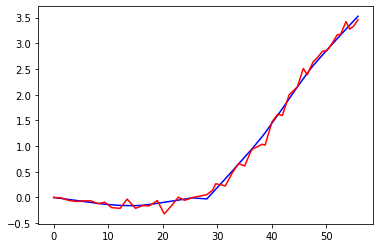

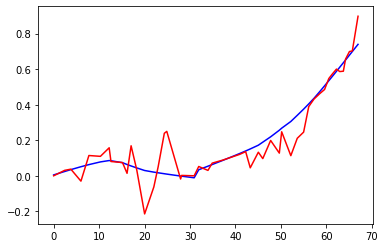

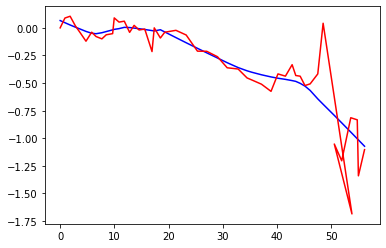

In [41]:
from matplotlib import pyplot as plt

for idx in range(141,161):
    try:
        with open(f"data/argoverse_processed_smoothing/train/{idx}.pkl", 'rb') as f:
            smoothing_data = pickle.load(f)

        with open(f"data/argoverse_processed/train/{idx}.pkl", 'rb') as f:
            original_data = pickle.load(f)
    except:
        continue


    x = np.concatenate((smoothing_data["AGENT"]["XY_FEATURES"][...,0], smoothing_data["AGENT"]["LABELS"][...,0]))
    y = np.concatenate((smoothing_data["AGENT"]["XY_FEATURES"][...,1], smoothing_data["AGENT"]["LABELS"][...,1]))

    plt.plot(x,y, color = 'blue')

    x = np.concatenate((original_data["AGENT"]["XY_FEATURES"][...,0], original_data["AGENT"]["LABELS"][...,0]))
    y = np.concatenate((original_data["AGENT"]["XY_FEATURES"][...,1], original_data["AGENT"]["LABELS"][...,1]))
    plt.plot(x,y, color = 'red')

    plt.show()

In [18]:
smoothing_data["AGENT"]["LABELS"][...,0]

array([30.895895  , 32.40738678, 34.23503876, 35.45976257, 37.13433075,
       38.57755661, 40.2868309 , 41.95154953, 43.34318161, 44.89794922,
       46.47922516, 48.01144028, 49.63371277, 50.99451065, 52.6288681 ,
       54.35647202, 55.82440567, 57.4679451 , 58.8314476 , 58.8314476 ,
       61.95448685, 63.89785385, 65.3860321 , 66.35830688, 67.94709778,
       69.68006134, 71.23833466, 72.84959412, 74.3837204 , 75.92485809])

argoverse_processed
